## Image Segmentation

see eg paper: Brain Tumor detection using color-based K-means clustering segmentation

challenge in neuroscience: tracking tumor objects in mr brain images

idea: gray scale image of the brain, translate into colored image (RGB) s.t. each pixel has three coordinates, cluster those data points in the hope that each different brain material is assigned the same cluster (e.g. bone, soft tissue, fat, background and the tumor). 

why consensus clustering/ parameter search? there is a need for fast and accurate clustering, with the help of consensus clustering we can find the parameters for a fast clustering technique and then use on many brain images. also one could do just consensus clustering (computationally expensive) in the hope for a better result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from consensus_clustering import consensus
from consensus_clustering.lib import distance as cl_dist
from consensus_clustering.lib import density
from consensus_clustering.lib import similarity
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn.apionly as sns
#sns.set(style="ticks", color_codes=True)
%matplotlib inline

### Load data (txt file format)

data source: https://figshare.com/articles/brain_tumor_dataset/1512427

In [2]:
image=open(".\\consensus_clustering\\data\\brain.txt",'r')
brain=image.read()
image.close()

Convert to array of shape 512x512

In [3]:
brainarr=np.zeros((262144,))
index=0
for i in brain.split('\n'):
    for j in i.split(','):
        if j=='':
            continue
        integerv=int(j)
        brainarr[index]=integerv
        index+=1

In [4]:
brainarr2=np.reshape(brainarr,(512,512))

Plot the grayscale image, note: python automatically assigns a pseudocolor to each pixel for plotting

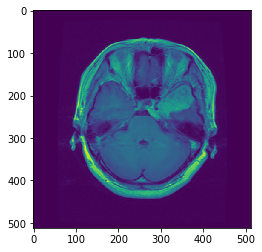

In [5]:
plt.imshow(brainarr2)

### Turn grayscale image into RGB image using the Python colormap

In [6]:
brainarr_rgb=np.zeros((512,512,4))

In [7]:
import matplotlib.cm as cm
index_j=0
index_k=0
for j in np.arange(512):
    for k in np.arange(512):
        brainarr_rgb[j,k,:]=cm.spectral((brainarr2[j,k]-np.min(brainarr))/3366)

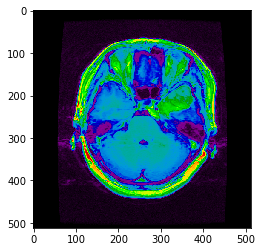

In [8]:
plt.imshow(brainarr_rgb)

Visualize data and preprocess for clustering

In [9]:
data_large=brainarr_rgb.reshape((262144,4))

Cut image in order to decrease amount of data points for clustering

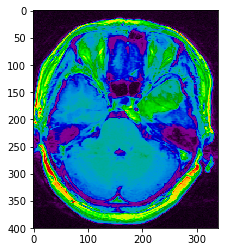

In [10]:
brainarr_rgb_small=brainarr_rgb[np.arange(50,450),:,:]
brainarr_rgb_small=brainarr_rgb_small[:,np.arange(100,440),:]
plt.imshow(brainarr_rgb_small)

#visualize as 4x4 plots, for each of the 4 dimensions
data=brainarr_rgb_small.reshape((136000,4))

### K-Means

In [11]:
k = 3

# Fit
kmeans_obj = cl_dist.KMeans(data, k)
kmeans_obj.fit()
labels = kmeans_obj.cluster_labels

# Plot
dataframekm=pd.DataFrame(data,columns=["1","2","3","4"])
dataframekm["labels"]=labels

terminated by break condition
6 iterations until termination.
Finished after 0:00:00.267690
max within-cluster distance to center: 0.924100
mean within-cluster distance to center: 0.243400
sum of within cluster squared errors: 10881.094693


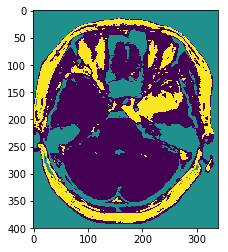

In [12]:
plt.imshow(labels.reshape(np.shape(brainarr_rgb_small)[0:2]))

Remarks: still a lot to improve (tumor is assigned to the same cluster as bone, but maybe thats not a problem and can be done in a postprocessing step), also the image is probably to large for consensus clustering? 